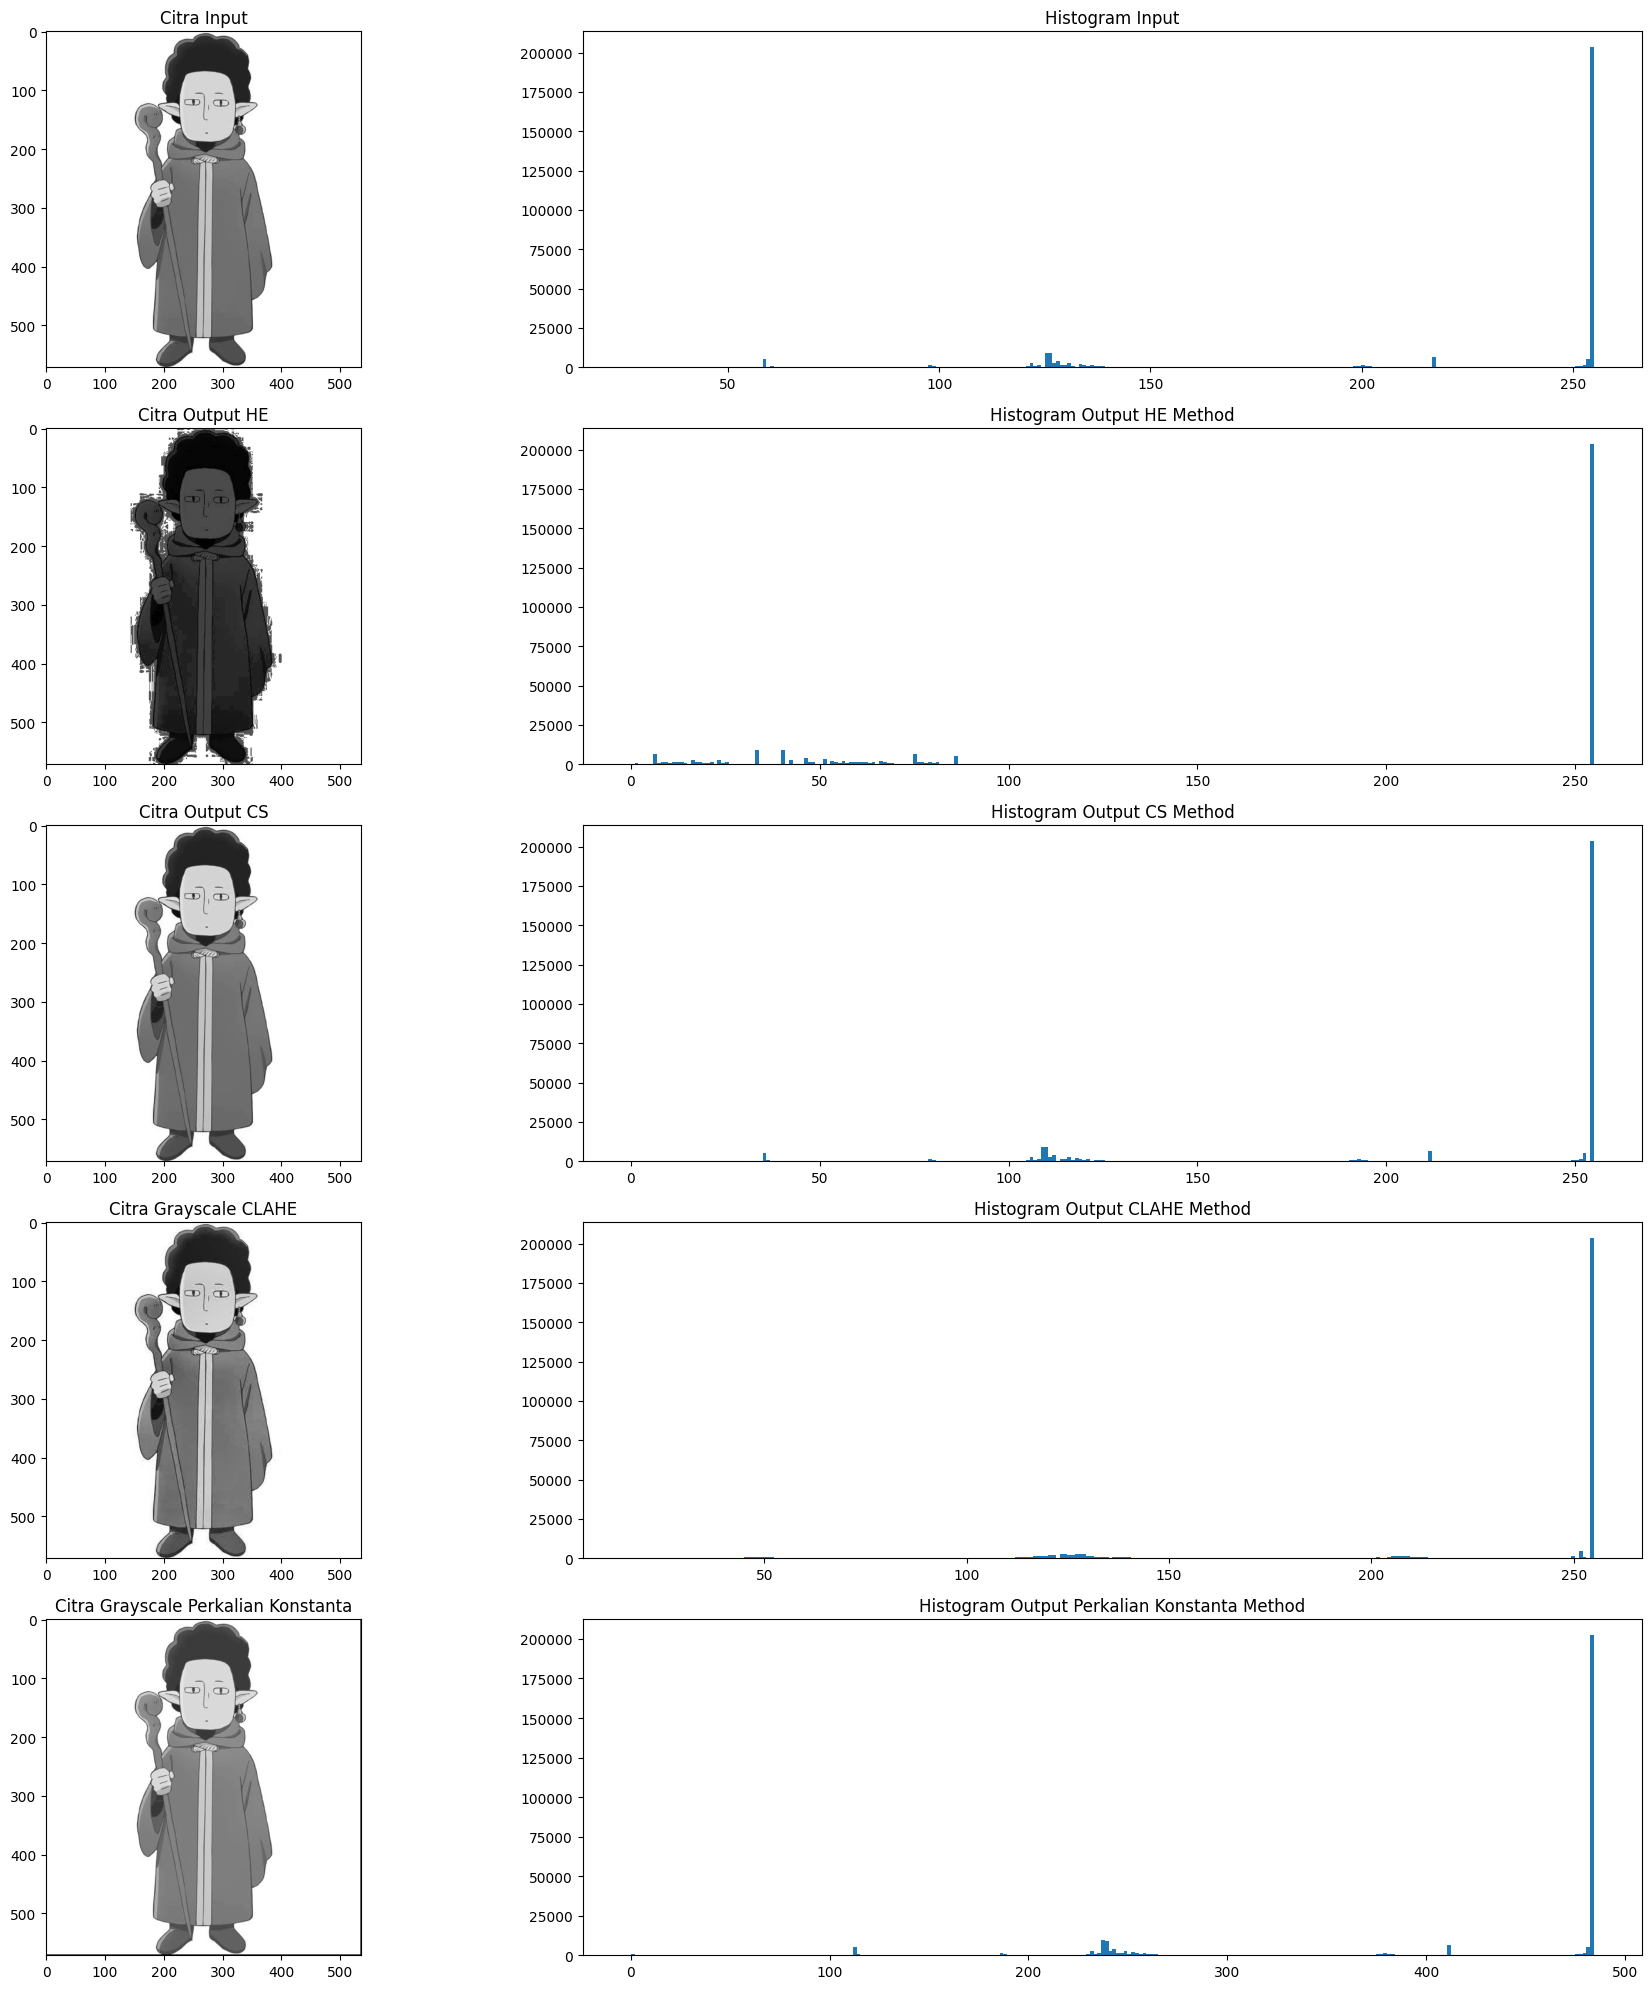

In [2]:
#Praktikum 7.1 - Contrast Enhancment

#Import Library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data
#Read Image
img = cv2.imread("yamada.jpg")
# Convert Image to Grayscale
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Mengkonversi gambar ke skala keabuan (grayscale) 

#Penerapan Histogram Equalization (HE)
image_equalized = cv2.equalizeHist(image)#Penerapan Histogram Equalization (HE) pada gambar 
#Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))#Penerapan metode Contrast Limited Adaptive Histogram Equalization (CLAHE) 

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)
#Penerapan metode Contrast Stretching (CS)
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

#Penerapan Metode Perkalian Konstanta
copyCamera = image.copy().astype(float)

m1,n1 = copyCamera.shape
output1 = np.empty([m1, n1])

for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9
#Plot Image
fig, axes = plt.subplots(5, 2, figsize=(20, 20))#Penerapan metode Contrast Limited Adaptive Histogram Equalization (CLAHE) 
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()

Text(0.5, 1.0, 'Histogram Output')

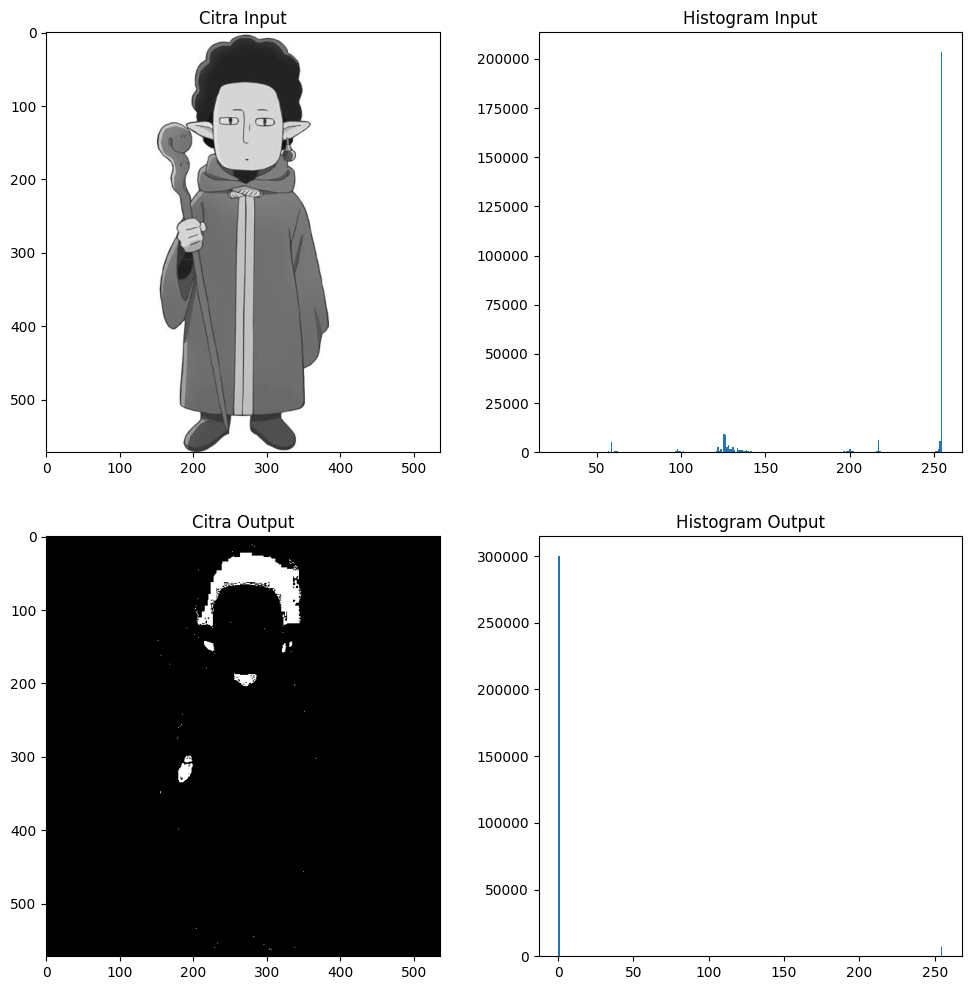

In [3]:
#Praktikum 7.2 - Gray Level Slicing

#Import Library
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

#Read Image
image = cv2.imread("yamada.jpg")
# Convert Image to Grayscale
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

row, column = img.shape

img1 = np.zeros((row,column),dtype = 'uint8')
 
#Menentukan rentang intensitas gray level yang akan dipertahankan
min_range = 10
max_range = 60
 
#Melakukan iterasi pada setiap piksel dalam citra menggunakan nested loop
for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range:#Pada setiap piksel, dilakukan pengecekan apakah nilai intensitas gray level berada dalam rentang yang ditentukan 
            img1[i,j] = 255
        else:
            img1[i,j] = 0
#Plot Image
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(img.ravel(), bins=256)#menampilkan hasil histogram
ax[1].set_title('Histogram Input')

ax[2].imshow(img1, cmap=plt.cm.gray)
ax[2].set_title("Citra Output")
ax[3].hist(img1.ravel(), bins=256)
ax[3].set_title('Histogram Output')

Shape citra 1 :  (312, 250)
Shape citra 1 :  (252, 250)


Text(0.5, 1.0, 'Citra 2')

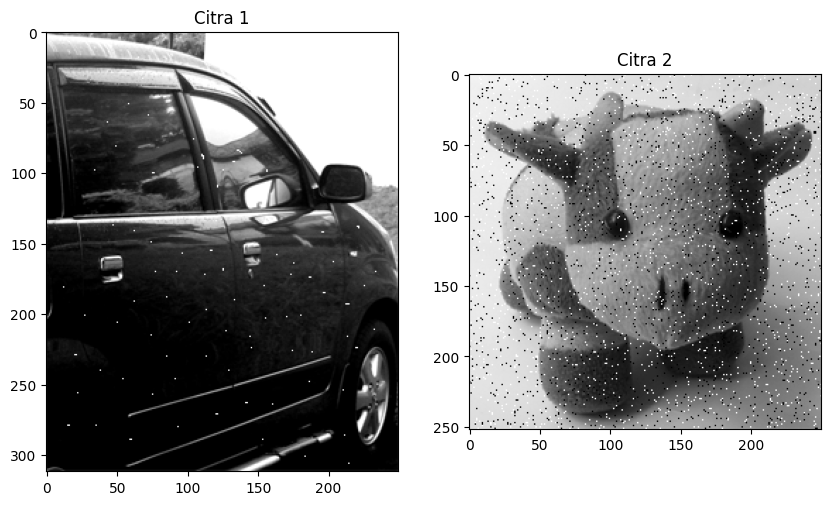

In [22]:
#Praktikum PCD 7.3 - Filter Rerata
#Import Library
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np
#Load & Plot Input Image
citra1 = imread(fname="mobil.tif")
citra2 = imread(fname="boneka2.tif")
#Menampilkan dimensi citra pertama dan citra kedua 
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))#Membuat plot dengan ukuran 1x2
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [28]:
#Menyiapkan variable output
copyCitra1 = citra1.copy().astype(float)#salinan gambar yang dibuat ke dtipe datA Float
copyCitra2 = citra2.copy().astype(float)
#ukuran baris dan kolom
m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])
m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])
#menampilkan ukuran gambar/menampilkan informasi tentang dimensi citra dan variabel output
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (252, 250)
Shape output citra 3 :  (252, 250)
m2 :  252
n2 :  250



Text(0.5, 1.0, 'Output Citra 2')

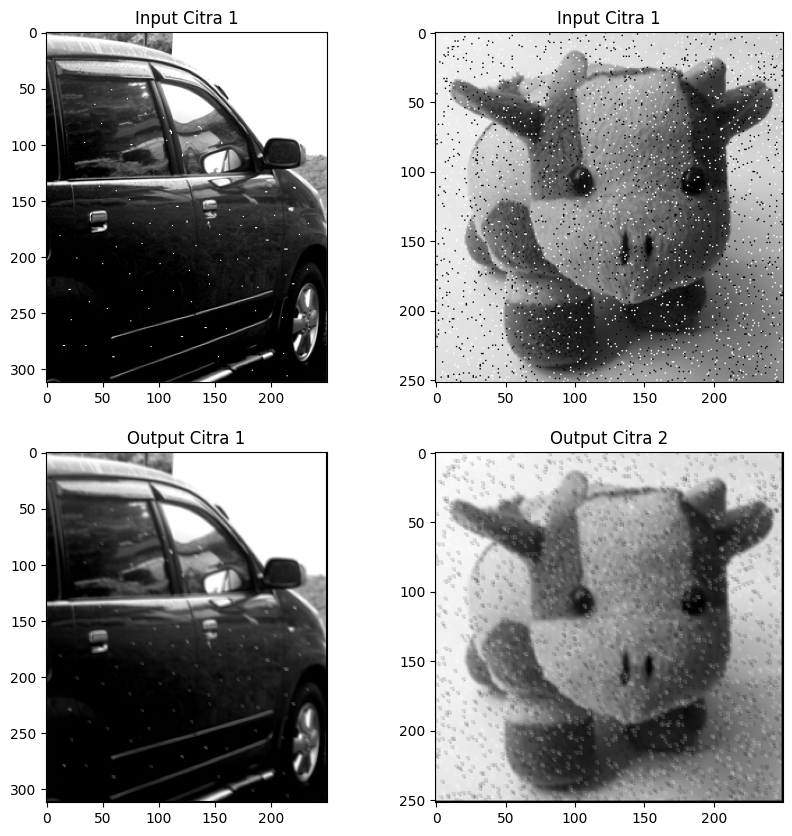

In [31]:
#Proses Filter Rerata Pada Citra Input 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1-1] + \#menghitung jumlah nilai piksel pada lingkungan sekitar piksel 
                 copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] + \
                 copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1];  
        output1[a1, b1] = (1/9 * jumlah)#Nilai output pada piksel saat ini dihitung dengan menggunakan rumus filter rerata, yaitu (1/9) * jumlah
#Proses Filter Rerata Pada Citra Input 2
for baris1 in range(0, m2-1):
    for kolom1 in range(0, n2-1):
        a1 = baris1
        b1 = kolom1
        jumlah = copyCitra2[a1-1, b1-1] + copyCitra2[a1-1, b1] + copyCitra2[a1-1, b1-1] + \##menghitung jumlah nilai piksel pada lingkungan sekitar piksel 
                 copyCitra2[a1, b1-1] + copyCitra2[a1, b1] + copyCitra2[a1, b1+1] + \
                 copyCitra2[a1+1, b1-1] + copyCitra2[a1+1, b1] + copyCitra2[a1+1, b1+1];  
        output2[a1, b1] = (1/9 * jumlah)#Nilai output pada piksel saat ini dihitung dengan menggunakan rumus filter rerata, yaitu (1/9) * jumlah
#Plot Citra Input dan Output Hasil dari Filter Rerata
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')#menampilkan gambar
ax[0].set_title("Input Citra 1")#memberikan judul pada gambar yang akan ditampilkan

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")

Shape citra 1 :  (312, 250)
Shape citra 1 :  (252, 250)


Text(0.5, 1.0, 'Citra 2')

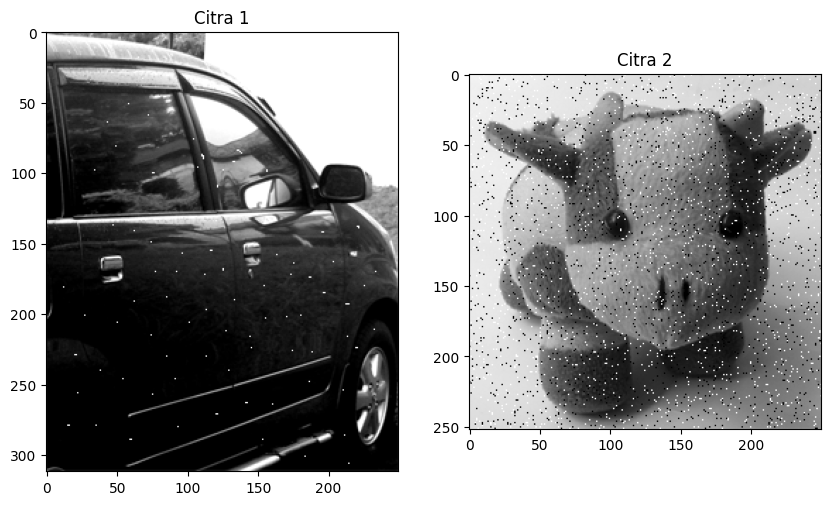

In [9]:
#Praktikum PCD 7.4 - Filter Median

#Import Library
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np
#Load & Plot Input Image
citra1 = imread(fname="mobil.tif")
citra2 = imread(fname="boneka2.tif")

print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [10]:
#Menyiapkan variable output
copyCitra1 = citra1.copy() #membuat salinan gambar
copyCitra2 = citra2.copy()
#ukuran baris dan kolom
m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])
#menampilkan ukuran gambar/menampilkan informasi tentang dimensi citra dan variabel output
print('Shape copy citra 1 : ', copyCitra1.shape) 
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (252, 250)
Shape output citra 3 :  (252, 250)
m2 :  252
n2 :  250



Text(0.5, 1.0, 'Output Citra 2')

/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


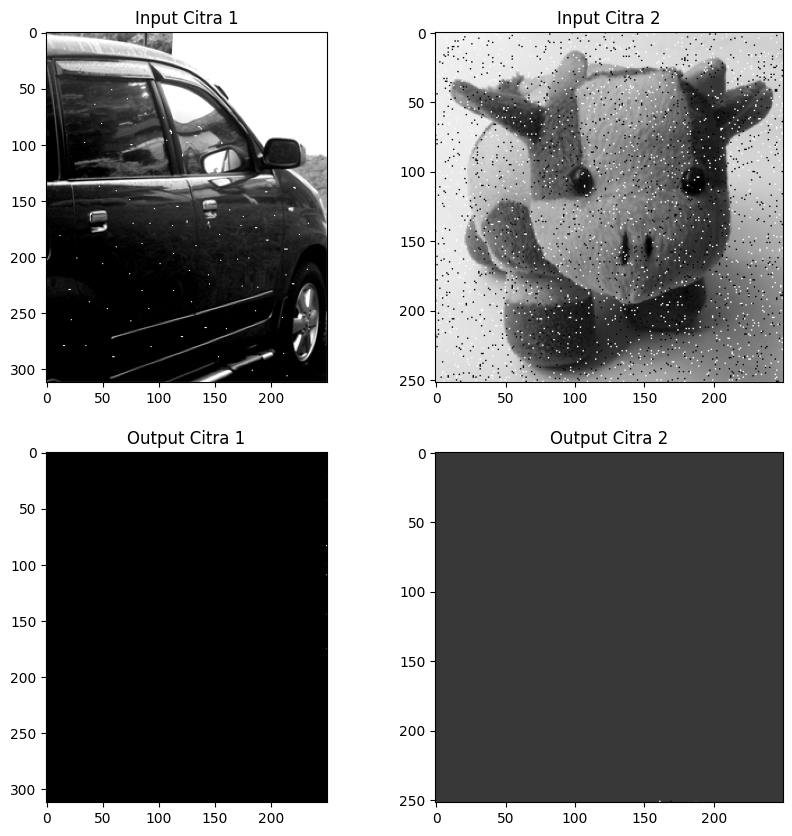

In [11]:
#Proses Filter Median Pada Citra Input 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \#menghitung jumlah nilai piksel pada lingkungan sekitar piksel saat ini
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output1[a1, b1] = dataA[5]
#Proses Filter Median Pada Citra Input 2
for baris in range(0, m2-1):
    for kolom in range(0, n2-1):
        a1 = baris
        b1 = kolom
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \#menghitung jumlah nilai piksel pada lingkungan sekitar piksel saat ini
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output2[a1, b1] = dataA[5]
#Plot Citra Input dan Output Hasil dari Filter Rerata
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")

Shape citra 1 :  (312, 250)
Shape citra 1 :  (252, 250)


Text(0.5, 1.0, 'Citra 2')

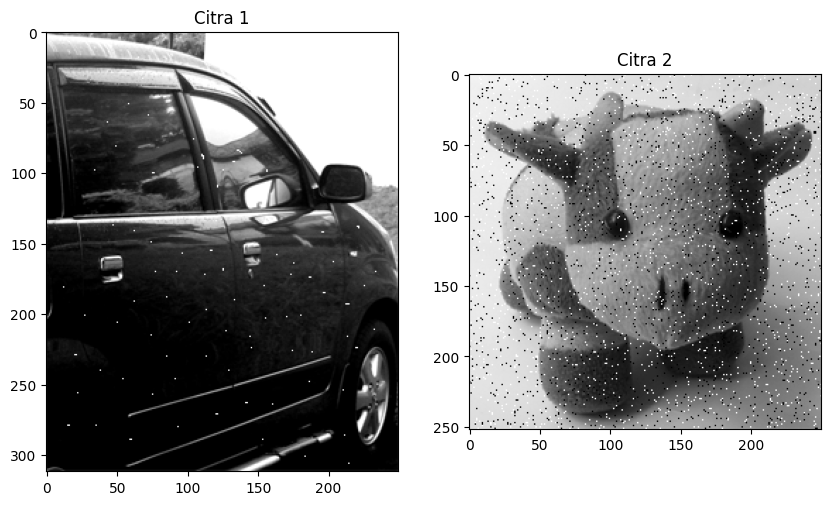

In [40]:
#Praktikum PCD 7.5 - Filter Batas

#Import Library
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

#Load & Plot Input Image
citra1 = imread(fname="mobil.tif")
citra2 = imread(fname="boneka2.tif")

print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [41]:
#Menyiapkan variable output
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (252, 250)
Shape output citra 3 :  (252, 250)
m2 :  252
n2 :  250



Text(0.5, 1.0, 'Output Citra 2')

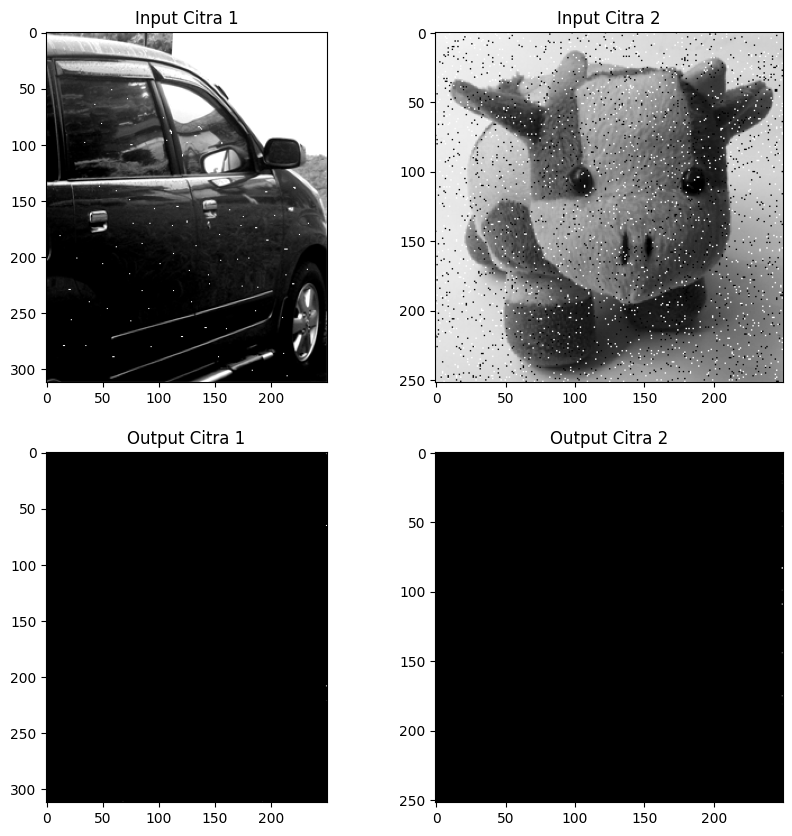

In [43]:
#Proses Filter Batas Pada Citra Input 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        
        a1 = baris
        b1 = kolom
        
        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        if copyCitra1[baris, kolom] < minPiksel :
            output1[baris, kolom] = minPiksel
        else :
            if copyCitra1[baris, kolom] > maksPiksel :
                output1[baris, kolom] = maksPiksel
            else :
                output1[baris, kolom] = copyCitra1[baris, kolom]
#Proses Filter Batas Pada Citra Input 2
for baris1 in range(0, m2-1):
    for kolom1 in range(0, n2-1):
        
        a1 = baris1
        b1 = kolom1
        
        arr = np.array([copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1, b1+1], \
            copyCitra2[a1, b1-1], copyCitra2[a1, b1+1], copyCitra2[a1+1, b1-1],  \
            copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]])
        
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        if copyCitra2[baris1, kolom1] < minPiksel :
            output2[baris1, kolom1] = minPiksel
        else :
            if copyCitra2[baris1, kolom1] > maksPiksel :
                output2[baris1, kolom1] = maksPiksel
            else :
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1]
#Plot Citra Input dan Output Hasil dari Filter Batas
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")

(636, 512)


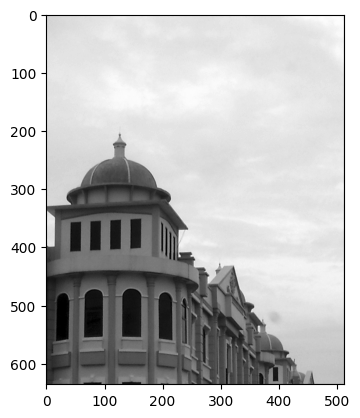

In [67]:
#Praktikum 7.6 - Konvolusi

#Import Library
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

import cv2

#Load Image
citra1 = imread(fname="gedung.tif")#untuk membaca citra file yang ditentukan oleh argumen 'fname'

print(citra1.shape)#mencetak dimensi citra dengan menggunakan atribut shape pada variabel 'citra1'

plt.imshow(citra1, cmap='gray')

Text(0.5, 1.0, 'Citra Output')

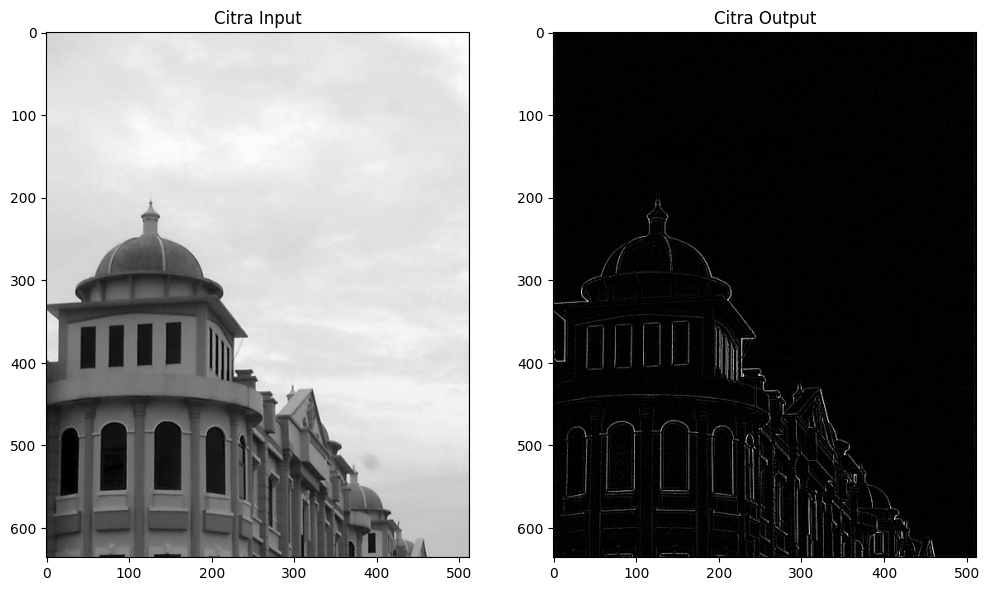

In [68]:
#Proses Konvolusi
kernel = np.array([[-1, 0, -1], ##Membuat kernel yang merupakan sebuah matriks 3x3 dengan nilai-nilai tertentu.

                   [0, 4, 0], 
                   [-1, 0, -1]])

#Applying the filter2D() function
citraOutput = cv2.filter2D(citra1, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(12, 12))#Membuat sebuah figure dengan 1 baris dan 2 kolom subplot, dengan ukuran (12, 12).
ax = axes.ravel()#Mengubah array dari objek axes menjadi 1 dimensi dan disimpan dalam variabel `ax`.


ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra Input")
ax[1].imshow(citraOutput, cmap = 'gray')
ax[1].set_title("Citra Output")

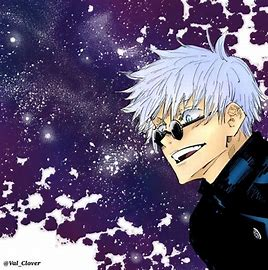

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


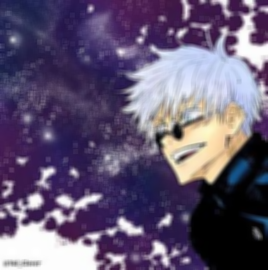

In [24]:
# Praktikum 7.7-Operasi Image Filtering dan Thresholding
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


#bgr
img = cv2.imread('satoru.jpeg') #membaca gambar

#rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv2_imshow(img)


# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)

cv2_imshow(kucing_filter)

# salt and pepper


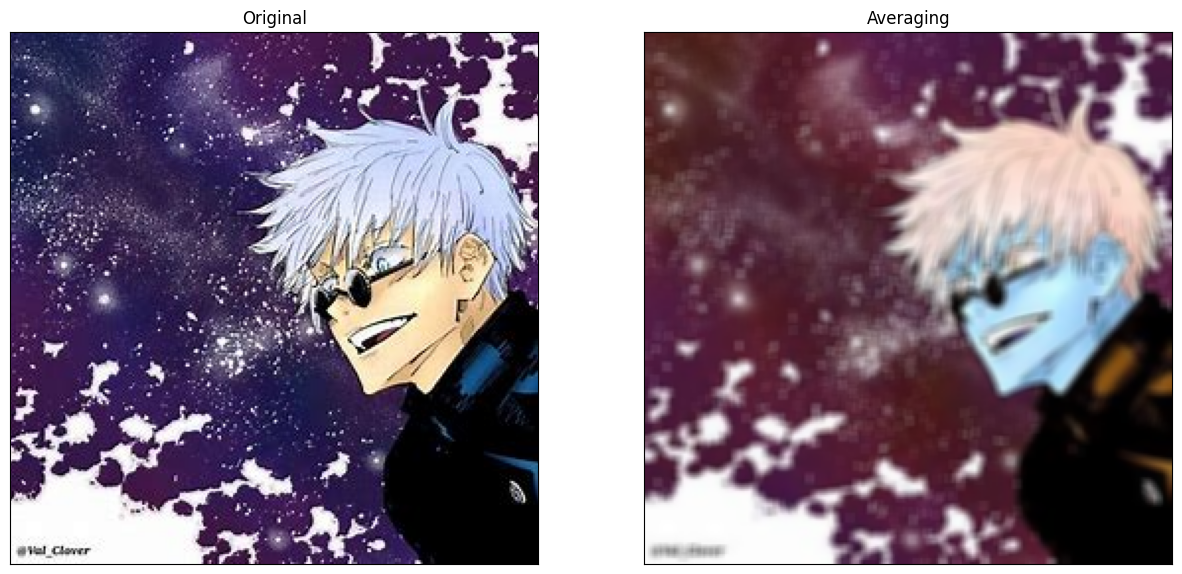

In [10]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

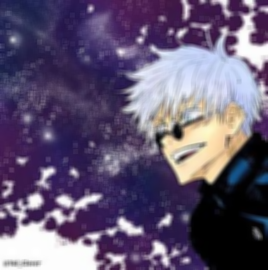

In [11]:
kucing_blur = cv2.blur(img,(5,5))

cv2_imshow(kucing_blur)

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


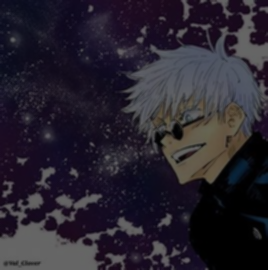

In [12]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
cv2_imshow(kucing_filter)

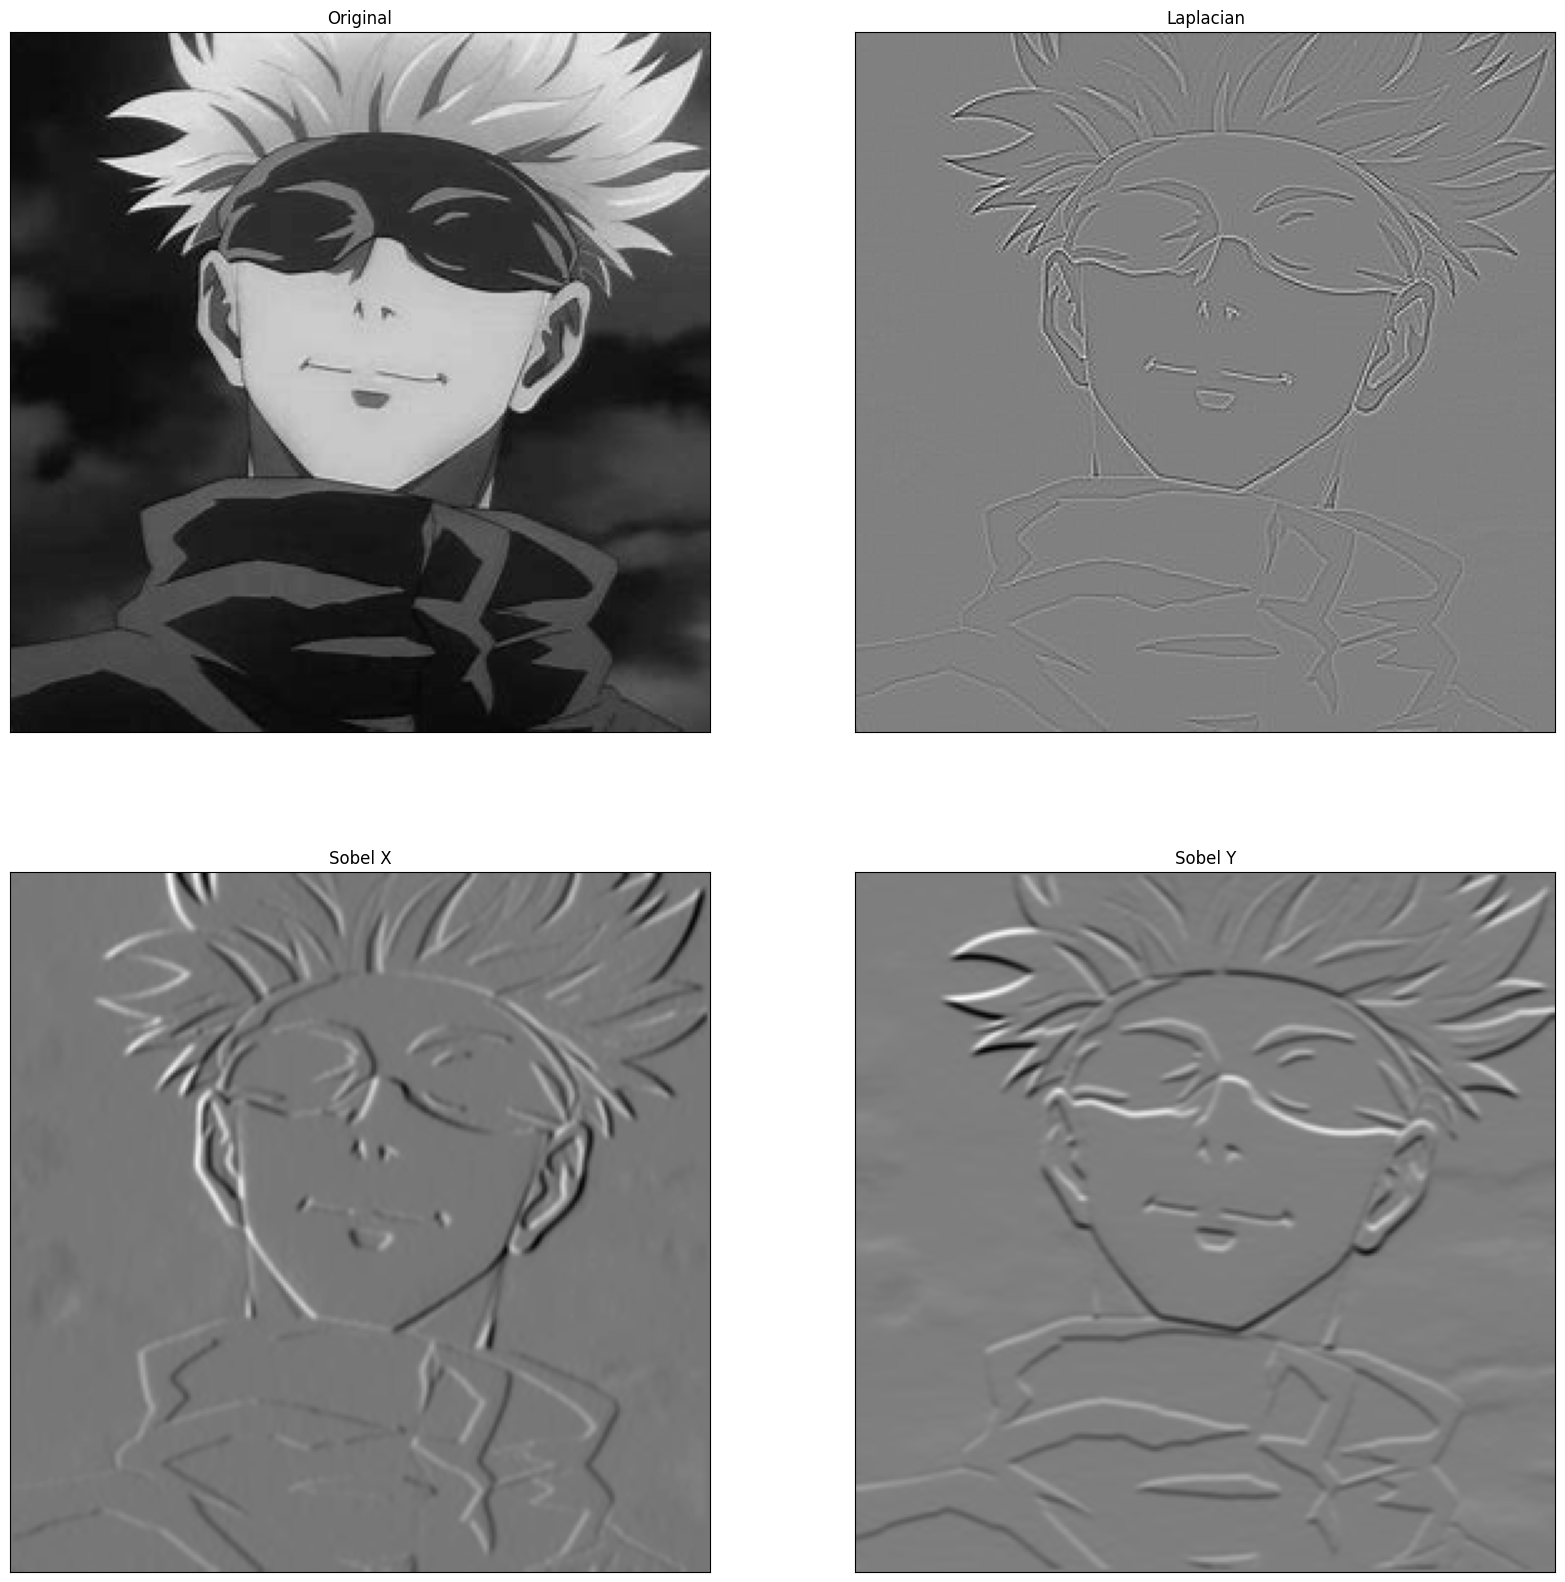

In [47]:
# Highpass Filter

# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja 
# di bagian awal, selama notebook ini tetap terhubung
import cv2
import numpy as np
from matplotlib import pyplot as plt


# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('gojo.jpeg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

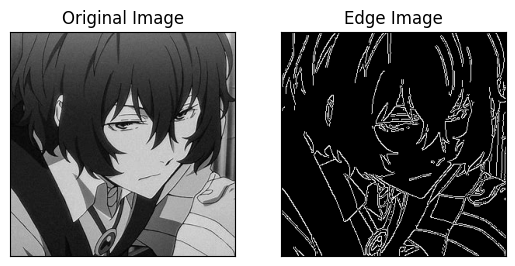

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('dazai.jpeg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

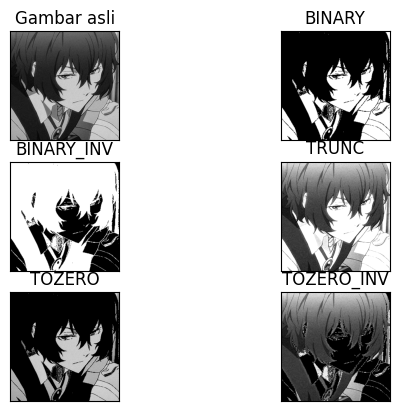

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# membaca gambar baymax 
img = cv2.imread('dazai.jpeg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

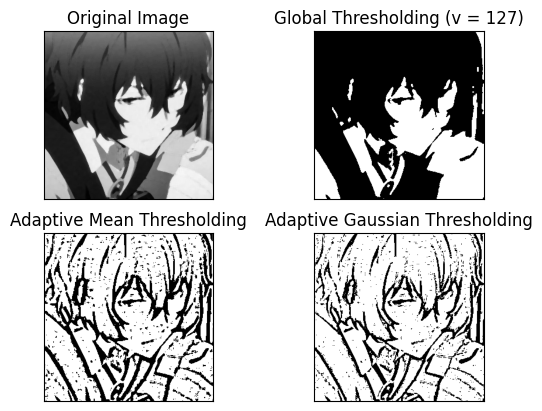

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# masih menggunakan variabel img yang sama
#img = cv2.imread('images/baymax.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

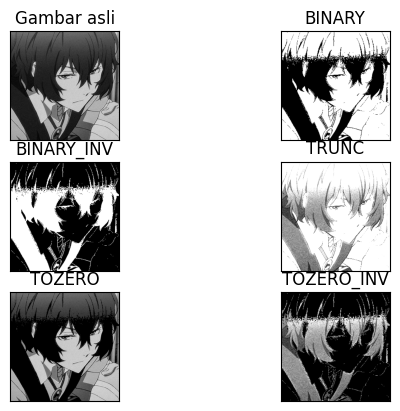

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# membaca gambar baymax 
img = cv2.imread('dazai.jpeg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,50,100,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,50,100,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,50,100,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,50,100,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,50,100,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


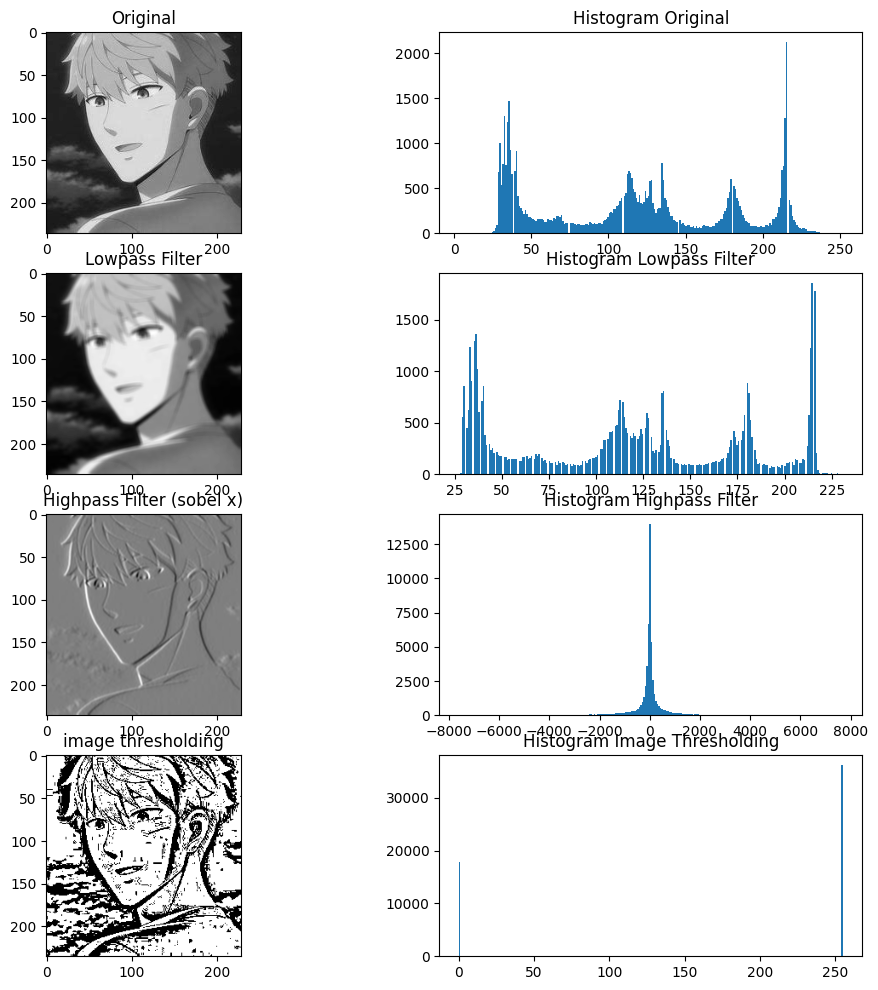

In [51]:
#lowpass filter
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#membaca image
image = cv2.imread('loid.jpeg')
#konversi image ke grayscale
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)


# filter highpass menggunakan sobel x
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)


#image thresholding menggunakan adaptive mean thresholding
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)

# menampilkan hasil gambar 
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(img,'gray')
ax[0].set_title("Original")
ax[1].hist(img.ravel(), bins=256)#menampilkan histogram
ax[1].set_title('Histogram Original')
#menampilkan gambar hasil filter
ax[2].imshow(kucing_filter,'gray')
ax[2].set_title("Lowpass Filter")
ax[3].hist(kucing_filter.ravel(), bins=256)#menampilkan histogram
ax[3].set_title('Histogram Lowpass Filter')

ax[4].imshow(sobelx,cmap = 'gray')
ax[4].set_title("Highpass Filter (sobel x)")
ax[5].hist(sobelx.ravel(), bins=256)#menampilkan histogram
ax[5].set_title('Histogram Highpass Filter')

ax[6].imshow(th2,'gray')
ax[6].set_title("image thresholding")
ax[7].hist(th2.ravel(), bins=256)#menampilkan histogram
ax[7].set_title('Histogram Image Thresholding')

plt.show()

